#Projekt zaliczeniowy
Studia podyplomowe **"Data Science: poziom podstawowy" 2021/2022**, Uniwersytet Ekonomiczny we Wrocławiu

**Autor**: Agnieszka Michalak (505156)

**Temat**: Dobrostan psychiczny i uwarunkowania demograficzno-społeczne a poczucie szczęścia mieszkańców różnych państw - eksploracyjna analiza danych.

#Cel projektu

#Przygotowanie środowiska

Importuje biblioteki, z których będę korzystała podczas analizy danych.

In [1]:
import pandas as pd    
import numpy as np
from scipy import stats
import scipy.stats 
from scipy.stats import shapiro 
!pip install pingouin --upgrade
import pingouin as pg
from pingouin import welch_anova
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=20508f77a6936f66cb0795c69d47e9ecc77c82e2a5a0341f6b591b2cc28097c6
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

#Import i przygotowanie danych

Przystępuję do wczytania danych, wyboru potrzebnych zmiennych, łączenia ramek danych, uzupełniania braków w danych.

In [3]:
from google.colab import files
uploaded=files.upload()


Saving Data2022.csv to Data2022 (1).csv
Saving prevalence-by-mental-and-substance-use-disorder.csv to prevalence-by-mental-and-substance-use-disorder.csv
Saving suicide-rates-vs-prevalence-of-mental-and-substance-use-disorders.csv to suicide-rates-vs-prevalence-of-mental-and-substance-use-disorders.csv
Saving suicide-rates-by-age-detailed----self harm.csv to suicide-rates-by-age-detailed----self harm.csv
Saving prevalence-of-depression-by-age.csv to prevalence-of-depression-by-age.csv
Saving prevalence-of-depression-males-vs-females.csv to prevalence-of-depression-males-vs-females.csv
Saving suicide-death-rates-by-sexY.csv to suicide-death-rates-by-sexY.csv
Saving gdp_per_capita.csv to gdp_per_capita.csv
Saving 5ccc4db6-7673-414d-8d2a-bb75d91f1dad_Data.csv to 5ccc4db6-7673-414d-8d2a-bb75d91f1dad_Data.csv


In [ ]:
data=pd.read_csv('Data2022.csv', delimiter=',')
df_happiness=data.copy().sort_values(['Country name', 'year'])
df_happiness

In [5]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [6]:
#from google.colab import files
#uploaded=files.upload()

In [7]:
gdppercapita=pd.read_csv('gdp_per_capita.csv', delimiter=',')
df_gdpwide=gdppercapita.copy()
df_gdpwide.head(10)

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4247.630047,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5395.659532,5246.292306,NaN
6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38686.461264,39540.724814,41303.929371,35770.776704,37475.635059,38964.904478,41791.969837,40897.330873,NaN,NaN
7,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7378.231890,7373.201678,7300.030219,6220.716636,5969.616593,5987.341957,6504.148493,6489.043216,5612.686570,NaN
8,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40976.490746,42412.639500,43751.805648,38663.400503,38141.867131,40644.791190,43839.324487,42701.443045,36284.555243,NaN
9,Argentina,ARG,NaN,NaN,1155.890717,850.304579,1173.238105,1279.113778,1272.803204,1062.543412,...,13082.664326,13080.254732,12334.798245,13789.060425,12790.242473,14613.041825,11795.159387,10056.637940,8579.017773,NaN


In [8]:
df_gdpwide.columns    # przygotowanie do zmiany formatu ramki danych z szerokiego na długi

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [9]:
df_gdp=df_gdpwide.melt(id_vars=['Country Name', 'Code'], value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020'], var_name=['year'], value_name='gdp per capita')
df_gdp=df_gdp.sort_values(['Country Name', 'year'])
df_gdp

,Country Name,Code,year,gdp per capita
2,Afghanistan,AFG,1990,NaN
268,Afghanistan,AFG,1991,NaN
534,Afghanistan,AFG,1992,NaN
800,Afghanistan,AFG,1993,NaN
1066,Afghanistan,AFG,1994,NaN
...,...,...,...,...
7181,Zimbabwe,ZWE,2016,1464.588957
7447,Zimbabwe,ZWE,2017,1235.189032
7713,Zimbabwe,ZWE,2018,1254.642265
7979,Zimbabwe,ZWE,2019,1316.740657


In [10]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8246 entries, 2 to 8245
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    8246 non-null   object 
 1   Code            8246 non-null   object 
 2   year            8246 non-null   object 
 3   gdp per capita  7661 non-null   float64
dtypes: float64(1), object(3)
memory usage: 322.1+ KB


In [11]:
df_gdp['year']=df_gdp['year'].apply(pd.to_numeric)  # zmieniam typ danych na INT, aby możliwe było połączenie ramek danych poprzez wskazaną kolumnę

In [12]:
df_happiness=pd.merge(df_happiness, df_gdp, how='left', left_on=['Country name', 'year'], right_on=['Country Name', 'year'])
df_happiness

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Country Name,Code,gdp per capita
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072,Afghanistan,AFG,364.663542
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,Afghanistan,AFG,437.268740
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,Afghanistan,AFG,543.306526
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,Afghanistan,AFG,591.190030
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440,Afghanistan,AFG,638.845852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647,Zimbabwe,ZWE,1235.189032
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508,Zimbabwe,ZWE,1254.642265
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455,Zimbabwe,ZWE,1316.740657
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302,Zimbabwe,ZWE,1214.509820


W kolejnych krokach usunę niepotrzebne kolumny, zmienię nazwy kolumn (m.in. ujednolicę format ich zapisu) oraz sprawdzę, czy typy danych są właściwe do działań, jakie będą na nich wykonywane, a także w jakich kolumnach występują braki danych.

In [13]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [14]:
df_happiness.drop(['Country Name', 'Log GDP per capita'], axis=1, inplace=True)

In [15]:
df_happiness.columns=map(str.lower, df_happiness.columns) 

In [16]:
df_happiness.rename({'country name': 'country','code':'alpha-3'}, axis=1, inplace=True) 
df_happiness=df_happiness.sort_values(['country', 'year'])

In [17]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   life ladder                        2089 non-null   float64
 3   social support                     2076 non-null   float64
 4   healthy life expectancy at birth   2031 non-null   float64
 5   freedom to make life choices       2057 non-null   float64
 6   generosity                         2009 non-null   float64
 7   perceptions of corruption          1976 non-null   float64
 8   positive affect                    2065 non-null   float64
 9   negative affect                    2073 non-null   float64
 10  confidence in national government  1873 non-null   float64
 11  alpha-3                            1750 non-null   objec

In [18]:
df_happiness['year'].min(), df_happiness['year'].max(), len(df_happiness['country'].unique())

(2005, 2021, 166)

Zbiór danych "*df_happiness"* zawiera.......... 1750 wierszy i 13 kolumn opisujących raportowany poziom satysfakcji życiowej mieszkańców 146 krajów w latach 2005-2020. 

Kolumny zawierające braki (oprócz tej, która zawiera dane o GDP per capita) przechowują informacje na temat tego jaka YYYYYYYYYY część wskaźnika satysfakcji jest wyjaśniana przez poszczgólną zmienną. Obserwowane braki danych nie są istotne dla dalszej analizy, ponieważ...........

In [ ]:
#from google.colab import files
#uploaded=files.upload()

Saving prevalence-by-mental-and-substance-use-disorder.csv to prevalence-by-mental-and-substance-use-disorder.csv


In [19]:
mentsubs=pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv', delimiter=',')
df_ment_subs=mentsubs.copy().sort_values(['Entity', 'Year'])
df_ment_subs

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.23,0.72,0.13,4.84,0.45,5.13,0.44
1,Afghanistan,AFG,1991,0.23,0.72,0.13,4.82,0.45,5.12,0.44
2,Afghanistan,AFG,1992,0.23,0.72,0.12,4.80,0.44,5.11,0.45
3,Afghanistan,AFG,1993,0.23,0.72,0.12,4.79,0.44,5.10,0.45
4,Afghanistan,AFG,1994,0.23,0.72,0.11,4.78,0.43,5.10,0.45
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.21,0.56,0.10,3.32,0.60,3.55,1.73
6836,Zimbabwe,ZWE,2016,0.21,0.56,0.10,3.32,0.60,3.56,1.69
6837,Zimbabwe,ZWE,2017,0.21,0.56,0.10,3.33,0.61,3.56,1.65
6838,Zimbabwe,ZWE,2018,0.21,0.56,0.10,3.32,0.61,3.56,1.69


Wszystkie kolumny tabeli df_ment_subs zawierają dane dla obydwu płci, wystandaryzowane wg wieku.

DEPRESIVE DISCORER_SSSSSSSSSSSSSSSs   ??????????????

In [20]:
df_ment_subs.rename({'Entity':'country',
                     'Code':'alpha-3',
                     'Year':'year', 
                     'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)':'schizophrenia',
                     'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)':'bipolar disorder',
                     'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)':'eating disorders',
                     'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)':'anxiety disorders',
                     'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)':'drug use disorders',
                     'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'depressive disorders',
                     'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)':'alcohol use disorders'}, 
                    axis=1, inplace=True)
df_ment_subs.head()

,country,alpha-3,year,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders
0,Afghanistan,AFG,1990,0.23,0.72,0.13,4.84,0.45,5.13,0.44
1,Afghanistan,AFG,1991,0.23,0.72,0.13,4.82,0.45,5.12,0.44
2,Afghanistan,AFG,1992,0.23,0.72,0.12,4.80,0.44,5.11,0.45
3,Afghanistan,AFG,1993,0.23,0.72,0.12,4.79,0.44,5.10,0.45
4,Afghanistan,AFG,1994,0.23,0.72,0.11,4.78,0.43,5.10,0.45


In [21]:
df_ment_subs.info()   # późniejsze łączenie kilku ramek danych może rozwiązać kwestię brakujących wartości w kolumnie 'alpha-3'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                6840 non-null   object 
 1   alpha-3                6150 non-null   object 
 2   year                   6840 non-null   int64  
 3   schizophrenia          6840 non-null   float64
 4   bipolar disorder       6840 non-null   float64
 5   eating disorders       6840 non-null   float64
 6   anxiety disorders      6840 non-null   float64
 7   drug use disorders     6840 non-null   float64
 8   depressive disorders   6840 non-null   float64
 9   alcohol use disorders  6840 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 587.8+ KB


In [22]:
df_ment_subs['year'].min(), df_ment_subs['year'].max(), len(df_ment_subs['country'].unique())

(1990, 2019, 228)

In [ ]:
#from google.colab import files
#uploaded=files.upload()

Saving suicide-death-rates-by-sexY.csv to suicide-death-rates-by-sexY.csv


In [23]:
suic=pd.read_csv('suicide-death-rates-by-sexY.csv', delimiter=',')
df_suicide=suic.copy()   #RATEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
df_suicide

,Entity,Code,Year,Female suicide rate (age-standardized),Male suicide rate (age-standardized),Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,5.46,14.75,8.28
1,Afghanistan,AFG,1991,5.43,14.81,8.17
2,Afghanistan,AFG,1992,5.38,14.80,8.14
3,Afghanistan,AFG,1993,5.41,15.02,8.23
4,Afghanistan,AFG,1994,5.50,15.34,8.36
...,...,...,...,...,...,...
7591,Zimbabwe,ZWE,2015,14.96,42.22,24.57
7592,Zimbabwe,ZWE,2016,14.77,41.69,24.53
7593,Zimbabwe,ZWE,2017,14.49,41.08,24.29
7594,Zimbabwe,ZWE,2018,NaN,NaN,23.91


In [24]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7596 entries, 0 to 7595
Data columns (total 6 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         7596 non-null   object 
 1   Code                                                           6150 non-null   object 
 2   Year                                                           7596 non-null   int64  
 3   Female suicide rate (age-standardized)                         6188 non-null   float64
 4   Male suicide rate (age-standardized)                           6188 non-null   float64
 5   Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)  6840 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 356.2+ KB


In [25]:
df_suicide['Year'].min(), df_suicide['Year'].max(), len(df_suicide['Entity'].unique())

(1990, 2019, 255)

In [ ]:
#from google.colab import files
#uploaded=files.upload()

Saving prevalence-of-depression-males-vs-females.csv to prevalence-of-depression-males-vs-females.csv


In [26]:
depr = pd.read_csv('prevalence-of-depression-males-vs-females.csv', delimiter=',')
df_depression=depr.copy()
df_depression

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.29,5.86,10694804.0,NaN
2,Afghanistan,AFG,1991,4.29,5.85,10745168.0,NaN
3,Afghanistan,AFG,1992,4.30,5.85,12057436.0,NaN
4,Afghanistan,AFG,1993,4.30,5.84,14003764.0,NaN
...,...,...,...,...,...,...,...
57904,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
57905,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN
57906,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN
57907,Zimbabwe,ZWE,2021,NaN,NaN,15993525.0,NaN


In [27]:
df_depression.info()    # zastanawia mnie znacząca liczba wierszy tej ramki oraz spora róźnica w liczbie danych jakie zawierają poszczególne kolumny: szukam przyczyn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57909 entries, 0 to 57908
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             57909 non-null  object 
 1   Code                                                                               54298 non-null  object 
 2   Year                                                                               57909 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)    6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)  6840 non-null   float64
 5   Population (historical estimates)                                                  57172 non-null  floa

In [28]:
df_depression['Year'].min(), df_depression['Year'].max(), len(df_depression['Entity'].unique())   # liczba przekracza wszystkie możliwe listy państw świata, sprawdzam co się w niej kryje

(-10000, 2021, 321)

In [29]:
list(df_depression['Entity'].unique())

['Abkhazia',
 'Afghanistan',
 'Africa',
 'African Region (WHO)',
 'Akrotiri and Dhekelia',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Austria-Hungary',
 'Azerbaijan',
 'Baden',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Bavaria',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyp

Liczba rekordów w badanej DataFrame jest bliska 58 tysięcy, ponieważ zawiera dane pochodzące z lat 10000 p.n.e - 2021 n.e. oraz 321 krajów (np. nieistniejących, jak USSR). Nadmiarowe dane w szybki sposób zostaną wyłączone z dalszej analizy poprzez łączenie tej ramki danych z danymi o samobójstwach. 

In [30]:
df_depr_suic=pd.merge(df_suicide, df_depression, how='inner', on=['Entity', 'Year'])
df_depr_suic.head()

,Entity,Code_x,Year,Female suicide rate (age-standardized),Male suicide rate (age-standardized),Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Code_y,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
0,Afghanistan,AFG,1990,5.46,14.75,8.28,AFG,4.29,5.86,10694804.0,NaN
1,Afghanistan,AFG,1991,5.43,14.81,8.17,AFG,4.29,5.85,10745168.0,NaN
2,Afghanistan,AFG,1992,5.38,14.80,8.14,AFG,4.30,5.85,12057436.0,NaN
3,Afghanistan,AFG,1993,5.41,15.02,8.23,AFG,4.30,5.84,14003764.0,NaN
4,Afghanistan,AFG,1994,5.50,15.34,8.36,AFG,4.31,5.84,15455560.0,NaN


In [31]:
df_depr_suic.info()     # podobnie jak poprzednio, brakującymi wartościami zajmę się po połączeniu ramek danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6952 entries, 0 to 6951
Data columns (total 11 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6952 non-null   object 
 1   Code_x                                                                             6150 non-null   object 
 2   Year                                                                               6952 non-null   int64  
 3   Female suicide rate (age-standardized)                                             5544 non-null   float64
 4   Male suicide rate (age-standardized)                                               5544 non-null   float64
 5   Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)                      6840 non-null   float

In [32]:
df_depr_suic[df_depr_suic['Code_x'].isnull()].equals(df_depr_suic[df_depr_suic['Code_y'].isnull()])      # porównywane kolumny zawierają braki danych w tych samych wierszach, więc usunę dowolną z nich (oraz niepotrzebną zmienną 'Continent') 

True

In [33]:
df_depr_suic.drop(['Code_y', 'Continent'], axis=1, inplace=True)  

In [34]:
df_depr_suic.rename({'Entity':'country', 
                   'Year':'year',
                   'Code_x':'alpha-3',                    
                   'Male suicide rate (age-standardized)':'male suicide rate',
                   'Female suicide rate (age-standardized)':'female suicide rate',
                   'Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)':'deaths by self-harm rate (both sexes)',
                   'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)':'male depressive disorder (percent)',
                   'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)':'female depressive disorder (percent)',
                   'Population (historical estimates)':'population'}, axis=1, inplace=True)
df_depr_suic.head()

,country,alpha-3,year,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population
0,Afghanistan,AFG,1990,5.46,14.75,8.28,4.29,5.86,10694804.0
1,Afghanistan,AFG,1991,5.43,14.81,8.17,4.29,5.85,10745168.0
2,Afghanistan,AFG,1992,5.38,14.80,8.14,4.30,5.85,12057436.0
3,Afghanistan,AFG,1993,5.41,15.02,8.23,4.30,5.84,14003764.0
4,Afghanistan,AFG,1994,5.50,15.34,8.36,4.31,5.84,15455560.0


In [35]:
df_depr_suic=df_depr_suic.astype({'population': 'Int64'})

In [36]:
df_depr_suic['year'].min(), df_depr_suic['year'].max(), len(df_depr_suic['country'].unique())

(1990, 2019, 232)

In [ ]:
#from google.colab import files          # MOŻĘ NIE?????????????????/
#uploaded=files.upload()

Saving suicide-rates-vs-prevalence-of-mental-and-substance-use-disorders.csv to suicide-rates-vs-prevalence-of-mental-and-substance-use-disorders.csv


In [37]:
mentals=pd.read_csv('suicide-rates-vs-prevalence-of-mental-and-substance-use-disorders.csv', delimiter=',')                                  ############# nie wiem co z tym zrobić...dodać sucide rate/ 
df_suic_mental=mentals.copy()
df_suic_mental

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate),Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,8.28,17415.208115,10694804.0,NaN
2,Afghanistan,AFG,1991,8.17,17691.565379,10745168.0,NaN
3,Afghanistan,AFG,1992,8.14,17939.244209,12057436.0,NaN
4,Afghanistan,AFG,1993,8.23,18134.237266,14003764.0,NaN
...,...,...,...,...,...,...,...
58716,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58717,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN
58718,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN
58719,Zimbabwe,ZWE,2021,NaN,NaN,15993525.0,NaN


In [38]:
df_psychopathology=pd.merge(df_ment_subs, df_depr_suic, how='inner', on=['country', 'year', 'alpha-3'])
df_psychopathology

,country,alpha-3,year,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population
0,Afghanistan,AFG,1990,0.23,0.72,0.13,4.84,0.45,5.13,0.44,5.46,14.75,8.28,4.29,5.86,10694804
1,Afghanistan,AFG,1991,0.23,0.72,0.13,4.82,0.45,5.12,0.44,5.43,14.81,8.17,4.29,5.85,10745168
2,Afghanistan,AFG,1992,0.23,0.72,0.12,4.80,0.44,5.11,0.45,5.38,14.80,8.14,4.30,5.85,12057436
3,Afghanistan,AFG,1993,0.23,0.72,0.12,4.79,0.44,5.10,0.45,5.41,15.02,8.23,4.30,5.84,14003764
4,Afghanistan,AFG,1994,0.23,0.72,0.11,4.78,0.43,5.10,0.45,5.50,15.34,8.36,4.31,5.84,15455560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.21,0.56,0.10,3.32,0.60,3.55,1.73,14.96,42.22,24.57,3.09,3.93,14154937
6836,Zimbabwe,ZWE,2016,0.21,0.56,0.10,3.32,0.60,3.56,1.69,14.77,41.69,24.53,3.09,3.94,14452705
6837,Zimbabwe,ZWE,2017,0.21,0.56,0.10,3.33,0.61,3.56,1.65,14.49,41.08,24.29,3.10,3.95,14751101
6838,Zimbabwe,ZWE,2018,0.21,0.56,0.10,3.32,0.61,3.56,1.69,NaN,NaN,23.91,3.09,3.95,15052191


In [39]:
df_psychopathology.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                6840 non-null   object 
 1   alpha-3                                6150 non-null   object 
 2   year                                   6840 non-null   int64  
 3   schizophrenia                          6840 non-null   float64
 4   bipolar disorder                       6840 non-null   float64
 5   eating disorders                       6840 non-null   float64
 6   anxiety disorders                      6840 non-null   float64
 7   drug use disorders                     6840 non-null   float64
 8   depressive disorders                   6840 non-null   float64
 9   alcohol use disorders                  6840 non-null   float64
 10  female suicide rate                    5432 non-null   float64
 11  male

In [40]:
df_psychopathology['year'].min(), df_psychopathology['year'].max(), len(df_psychopathology['country'].unique())

(1990, 2019, 228)

W kolejnym kroku przyjrzę się rekordom, które zawierają w sobie braki danych: najpierw dla kolumn opisujących wskaźnik samobójstw dla kobiet i mężczyzn, potem te, które występują w danych dotyczących liczebności populacji badanych krajów. Wartościom NaN w kolumnmie 'alpha-3' przyjrzę się na końcu.

In [41]:
f_suic_null=df_psychopathology[df_psychopathology['female suicide rate'].isnull()]
f_suic_null

,country,alpha-3,year,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population
28,Afghanistan,AFG,2018,0.23,0.73,0.12,5.01,0.57,5.12,0.44,NaN,NaN,6.22,4.40,5.85,36686788
29,Afghanistan,AFG,2019,0.23,0.73,0.12,5.03,0.52,5.13,0.44,NaN,NaN,6.13,4.40,5.87,37769496
30,African Region (WHO),NaN,1990,0.22,0.58,0.10,3.54,0.44,4.73,1.15,NaN,NaN,13.20,3.84,5.58,<NA>
31,African Region (WHO),NaN,1991,0.22,0.58,0.10,3.54,0.44,4.72,1.15,NaN,NaN,13.17,3.84,5.57,<NA>
32,African Region (WHO),NaN,1992,0.22,0.58,0.10,3.53,0.44,4.71,1.15,NaN,NaN,13.28,3.83,5.55,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,Yemen,YEM,2019,0.23,0.75,0.13,4.93,0.31,5.04,0.40,NaN,NaN,6.14,4.01,6.04,31546694
6808,Zambia,ZMB,2018,0.22,0.59,0.12,4.06,0.34,4.30,1.54,NaN,NaN,14.21,3.70,4.87,17835898
6809,Zambia,ZMB,2019,0.22,0.59,0.12,4.05,0.34,4.30,1.56,NaN,NaN,13.83,3.69,4.88,18380478
6838,Zimbabwe,ZWE,2018,0.21,0.56,0.10,3.32,0.61,3.56,1.69,NaN,NaN,23.91,3.09,3.95,15052191


In [42]:
m_suic_null=df_psychopathology[df_psychopathology['male suicide rate'].isnull()]
m_suic_null['male suicide rate'].equals(f_suic_null['female suicide rate'])

True

In [43]:
suic_bef_2018=f_suic_null.loc[f_suic_null['year']<2018]                   
suic_bef_2018

,country,alpha-3,year,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population
30,African Region (WHO),NaN,1990,0.22,0.58,0.10,3.54,0.44,4.73,1.15,NaN,NaN,13.20,3.84,5.58,<NA>
31,African Region (WHO),NaN,1991,0.22,0.58,0.10,3.54,0.44,4.72,1.15,NaN,NaN,13.17,3.84,5.57,<NA>
32,African Region (WHO),NaN,1992,0.22,0.58,0.10,3.53,0.44,4.71,1.15,NaN,NaN,13.28,3.83,5.55,<NA>
33,African Region (WHO),NaN,1993,0.22,0.58,0.10,3.53,0.45,4.70,1.14,NaN,NaN,13.11,3.83,5.54,<NA>
34,African Region (WHO),NaN,1994,0.22,0.58,0.10,3.53,0.45,4.70,1.14,NaN,NaN,13.14,3.82,5.54,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,World Bank Upper Middle Income,NaN,2013,0.31,0.47,0.16,4.13,0.71,3.31,1.51,NaN,NaN,8.88,2.55,4.02,<NA>
6744,World Bank Upper Middle Income,NaN,2014,0.31,0.47,0.16,4.10,0.71,3.32,1.51,NaN,NaN,8.67,2.55,4.05,<NA>
6745,World Bank Upper Middle Income,NaN,2015,0.31,0.48,0.16,4.09,0.71,3.33,1.51,NaN,NaN,8.38,2.56,4.07,<NA>
6746,World Bank Upper Middle Income,NaN,2016,0.31,0.48,0.17,4.14,0.73,3.33,1.51,NaN,NaN,8.22,2.56,4.07,<NA>


In [44]:
suic_aft_2018=f_suic_null.loc[f_suic_null['year']>=2018]
suic_aft_2018

,country,alpha-3,year,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population
28,Afghanistan,AFG,2018,0.23,0.73,0.12,5.01,0.57,5.12,0.44,NaN,NaN,6.22,4.40,5.85,36686788
29,Afghanistan,AFG,2019,0.23,0.73,0.12,5.03,0.52,5.13,0.44,NaN,NaN,6.13,4.40,5.87,37769496
58,African Region (WHO),NaN,2018,0.22,0.59,0.11,3.60,0.40,4.59,1.09,NaN,NaN,10.38,3.78,5.33,<NA>
59,African Region (WHO),NaN,2019,0.22,0.59,0.11,3.59,0.40,4.59,1.11,NaN,NaN,10.28,3.79,5.33,<NA>
88,Albania,ALB,2018,0.31,0.58,0.14,4.08,0.49,2.62,1.70,NaN,NaN,4.98,1.77,3.42,2877019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,Yemen,YEM,2019,0.23,0.75,0.13,4.93,0.31,5.04,0.40,NaN,NaN,6.14,4.01,6.04,31546694
6808,Zambia,ZMB,2018,0.22,0.59,0.12,4.06,0.34,4.30,1.54,NaN,NaN,14.21,3.70,4.87,17835898
6809,Zambia,ZMB,2019,0.22,0.59,0.12,4.05,0.34,4.30,1.56,NaN,NaN,13.83,3.69,4.88,18380478
6838,Zimbabwe,ZWE,2018,0.21,0.56,0.10,3.32,0.61,3.56,1.69,NaN,NaN,23.91,3.09,3.95,15052191


Analiza pierwszej z trzech powyższych ramek danych prowadzi do kilku wniosków, które potwierdziłam w kolejnych linijkach kodu, a mianowicie, że brakujące wartości w kolumnach wskaźnika samobójstw kobiet i mężczyzn:
*   pojawiają się w tych samych rekordach,
*   pojawiają się na przestrzeni wszystkich raportowanych lat m.in. w rejonach świata, tj. 'Africa Region (WHO)' (całościowy brak danych wyklucza możliwość zostawienia tych wierszy w mojej ramce danych),
*   występują także w szeregu innych krajów jedynie dla lat 2018 i 2019 (uzupełnię je danymi skopiowanymi z roku poprzedzającego wypełniany).

In [45]:
index_to_drop=df_psychopathology[(df_psychopathology['male suicide rate'].isnull())&(df_psychopathology['year']<2018)].index
df_psychopathology.drop(index_to_drop, inplace=True)

countries_to_drop=set(list(suic_bef_2018['country'])).intersection(list(suic_aft_2018['country']))       #   jest Wales i England
index_to_drop2=df_psychopathology[((df_psychopathology['female suicide rate'].isnull())|(df_psychopathology['year']>=2018))&(df_psychopathology['country'].isin(countries_to_drop))].index      #czemu??????????
df_psychopathology.drop(index_to_drop2, inplace=True)

df_psychopathology.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 0 to 6839
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                5820 non-null   object 
 1   alpha-3                                5820 non-null   object 
 2   year                                   5820 non-null   int64  
 3   schizophrenia                          5820 non-null   float64
 4   bipolar disorder                       5820 non-null   float64
 5   eating disorders                       5820 non-null   float64
 6   anxiety disorders                      5820 non-null   float64
 7   drug use disorders                     5820 non-null   float64
 8   depressive disorders                   5820 non-null   float64
 9   alcohol use disorders                  5820 non-null   float64
 10  female suicide rate                    5432 non-null   float64
 11  male

In [46]:
to_fill=['female suicide rate', 'male suicide rate']
df_psychopathology[to_fill]=df_psychopathology[to_fill].ffill()
df_psychopathology.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 0 to 6839
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                5820 non-null   object 
 1   alpha-3                                5820 non-null   object 
 2   year                                   5820 non-null   int64  
 3   schizophrenia                          5820 non-null   float64
 4   bipolar disorder                       5820 non-null   float64
 5   eating disorders                       5820 non-null   float64
 6   anxiety disorders                      5820 non-null   float64
 7   drug use disorders                     5820 non-null   float64
 8   depressive disorders                   5820 non-null   float64
 9   alcohol use disorders                  5820 non-null   float64
 10  female suicide rate                    5820 non-null   float64
 11  male

In [47]:
df_psychopathology['year'].min(), df_psychopathology['year'].max(), len(df_psychopathology['country'].unique())

(1990, 2019, 194)

Usunęłam z ramki danych wszystkie rekordy nie zawierające danych o wskaźniku samobójstw dla kobiet i mężczyzn, ponieważ byłyby one zbędne w dalszych etapach analizy. W wyniku wykonania tej operacji w DataFrame zniknęły także puste wartości z kolumn *alpha-3* i *population* (co oznacza, że znajdowały się one wyłącznie w usuniętych wierszach). Ramka danych dotycząca psychopatologii zawierają teraz 5432 rekordy, dla 194 krajów, opisujące lata 1990-2017.

In [48]:
df_all=pd.merge(df_happiness[['country', 'year', 'life ladder', 'gdp per capita','healthy life expectancy at birth']], df_psychopathology, how='inner', on=['country', 'year'],)
df_all

,country,year,life ladder,gdp per capita,healthy life expectancy at birth,alpha-3,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population
0,Afghanistan,2008,3.723590,364.663542,50.500000,AFG,0.22,0.72,0.10,4.82,0.52,5.10,0.44,5.02,15.53,7.55,4.35,5.82,26427204
1,Afghanistan,2009,4.401778,437.268740,50.799999,AFG,0.22,0.72,0.11,4.84,0.54,5.10,0.44,4.94,15.27,7.35,4.36,5.81,27385310
2,Afghanistan,2010,4.758381,543.306526,51.099998,AFG,0.22,0.72,0.11,4.85,0.54,5.10,0.44,4.89,15.03,7.17,4.37,5.81,28189672
3,Afghanistan,2011,3.831719,591.190030,51.400002,AFG,0.22,0.72,0.11,4.86,0.55,5.10,0.44,4.83,14.81,6.99,4.37,5.82,29249156
4,Afghanistan,2012,3.782938,638.845852,51.700001,AFG,0.22,0.72,0.11,4.89,0.55,5.10,0.44,4.77,14.58,6.81,4.38,5.82,30466484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,Zimbabwe,2015,3.703191,1445.069702,51.200001,ZWE,0.21,0.56,0.10,3.32,0.60,3.55,1.73,14.96,42.22,24.57,3.09,3.93,14154937
1764,Zimbabwe,2016,3.735400,1464.588957,51.674999,ZWE,0.21,0.56,0.10,3.32,0.60,3.56,1.69,14.77,41.69,24.53,3.09,3.94,14452705
1765,Zimbabwe,2017,3.638300,1235.189032,52.150002,ZWE,0.21,0.56,0.10,3.33,0.61,3.56,1.65,14.49,41.08,24.29,3.10,3.95,14751101
1766,Zimbabwe,2018,3.616480,1254.642265,52.625000,ZWE,0.21,0.56,0.10,3.32,0.61,3.56,1.69,14.49,41.08,23.91,3.09,3.95,15052191


In [ ]:
df_all.info() 

Zbiorcza ramka danych *df_all* zawiera 1768 wierszy z danymi zabranymi w 19 kolumnach. Typy danych odpowiadają zawartości kolumn, nie wymagają zmian. W 136 rekordach brakuje danych o produkcie krajowym brutto na mieszkańca, uzupełnię je danymi ze strony internetowej Banku Światowego.

In [ ]:
df_all[df_all['gdp per capita'].isnull()]

In [ ]:
nowe=pd.read_csv('5ccc4db6-7673-414d-8d2a-bb75d91f1dad_Data.csv', delimiter=',')
df_nowe=nowe.copy()
df_nowe.head()

In [ ]:
df_nowe.drop(['Series Name', 'Series Code'], axis=1, inplace=True)
df_nowe.drop(index=[14, 15, 16, 17, 18], axis=0, inplace=True)

for col in df_nowe.columns[2:]:
    df_nowe.rename(columns={col:col.split(' ')[0]}, inplace=True)
df_nowe

In [ ]:
df_nowe_melted=df_nowe.melt(id_vars=['Country Name', 'Country Code'], value_vars=df_nowe.columns[2:], var_name=['year'], value_name='gdp per capita')
df_nowe_melted=df_nowe_melted.sort_values(['Country Name', 'year'])
df_nowe_melted

In [ ]:
df_nowe_melted['gdp per capita']=df_nowe_melted['gdp per capita'].replace('..', np.nan)
df_nowe_melted.info()

In [ ]:
df_nowe_melted[df_nowe_melted['gdp per capita'].isnull()]

In [ ]:
df_nowe_melted[['year', 'gdp per capita']]=df_nowe_melted[['year', 'gdp per capita']].apply(pd.to_numeric)  # zmieniam typ danych na INT, aby możliwe było połączenie ramek danych poprzez wskazaną kolumnę

df_nowe_melted.rename({'Country Code':'alpha-3'}, axis=1, inplace=True)
df_nowe_melted.info()

In [ ]:
df_all=pd.merge(df_all, df_nowe_melted[['year', 'alpha-3', 'gdp per capita']], how='left', on=['year', 'alpha-3'])
df_all

In [ ]:
df_all['gdp per capita']=df_all['gdp per capita_x'].fillna(df_all['gdp per capita_y'])
df_all.drop(['gdp per capita_x', 'gdp per capita_y'], axis=1, inplace=True)
df_all.info()

In [ ]:
df_all['gdp per capita']=df_all['gdp per capita'].ffill()
df_all.info()

In [ ]:
#---------------------------------------

In [ ]:
depr_age = pd.read_csv('prevalence-of-depression-by-age.csv', delimiter=',')
df_depr_age=depr_age.copy()
df_depr_age

In [81]:
df_depr_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 13 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Entity                                                                           6840 non-null   object 
 1   Code                                                                             6150 non-null   object 
 2   Year                                                                             6840 non-null   int64  
 3   Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)          6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)          6840 non-null   float64
 5   Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)          6840 non-null   float64
 6   Prevalen

In [82]:
df_depr_age.drop(['Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)', 
                  'Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)',
                  'Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)',
                  'Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)',
                  'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'], axis=1, inplace=True)
df_depr_age.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)
0,Afghanistan,AFG,1990,1.80,4.00,5.58,6.96,6.43
1,Afghanistan,AFG,1991,1.78,3.96,5.58,6.97,6.37
2,Afghanistan,AFG,1992,1.77,3.90,5.58,6.98,6.32
3,Afghanistan,AFG,1993,1.76,3.86,5.58,6.99,6.32
4,Afghanistan,AFG,1994,1.76,3.82,5.58,7.00,6.35


In [83]:
death_age=pd.read_csv('suicide-rates-by-age-detailed----self harm.csv', delimiter=',')
df_death_age=death_age.copy()
df_death_age.head()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate),Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,10.69,12.47,6.10,0.41,10.12
1,Afghanistan,AFG,1991,10.57,12.36,5.96,0.39,9.93
2,Afghanistan,AFG,1992,10.52,12.34,5.88,0.39,9.88
3,Afghanistan,AFG,1993,10.55,12.50,5.90,0.39,10.06
4,Afghanistan,AFG,1994,10.62,12.73,5.93,0.38,10.30


In [84]:
df_death_age.info()         # dane prawie kompletne, brak kodów nazw krajów do niektórych państw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    6840 non-null   object 
 1   Code                                                      6150 non-null   object 
 2   Year                                                      6840 non-null   int64  
 3   Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)    6840 non-null   float64
 4   Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)  6840 non-null   float64
 5   Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)     6840 non-null   float64
 6   Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)   6840 non-null   float64
 7   Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)  6840 non-null   float64
dtypes: float64(5), int6

In [85]:
df_psychopathology_age=pd.merge(df_depr_age, df_death_age, how='inner', on=['Entity', 'Year', 'Code'])
df_psychopathology_age.rename({'Entity': 'country','Code':'code', 'Year': 'year'}, axis=1, inplace=True) 
df_psychopathology_age.head()

,country,code,year,Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate),Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,1.80,4.00,5.58,6.96,6.43,10.69,12.47,6.10,0.41,10.12
1,Afghanistan,AFG,1991,1.78,3.96,5.58,6.97,6.37,10.57,12.36,5.96,0.39,9.93
2,Afghanistan,AFG,1992,1.77,3.90,5.58,6.98,6.32,10.52,12.34,5.88,0.39,9.88
3,Afghanistan,AFG,1993,1.76,3.86,5.58,6.99,6.32,10.55,12.50,5.90,0.39,10.06
4,Afghanistan,AFG,1994,1.76,3.82,5.58,7.00,6.35,10.62,12.73,5.93,0.38,10.30


In [86]:
df_psychopathology_age=pd.merge(df_psychopathology_age, df_psychopathology[['country', 'year', 'population']], how='inner', on=['country', 'year'])
df_psychopathology_age.head()

,country,code,year,Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate),Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate),population
0,Afghanistan,AFG,1990,1.80,4.00,5.58,6.96,6.43,10.69,12.47,6.10,0.41,10.12,10694804
1,Afghanistan,AFG,1991,1.78,3.96,5.58,6.97,6.37,10.57,12.36,5.96,0.39,9.93,10745168
2,Afghanistan,AFG,1992,1.77,3.90,5.58,6.98,6.32,10.52,12.34,5.88,0.39,9.88,12057436
3,Afghanistan,AFG,1993,1.76,3.86,5.58,6.99,6.32,10.55,12.50,5.90,0.39,10.06,14003764
4,Afghanistan,AFG,1994,1.76,3.82,5.58,7.00,6.35,10.62,12.73,5.93,0.38,10.30,15455560


In [87]:
df_psychopathology_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820 entries, 0 to 5819
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   country                                                                     5820 non-null   object 
 1   code                                                                        5820 non-null   object 
 2   year                                                                        5820 non-null   int64  
 3   Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)     5820 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)     5820 non-null   float64
 5   Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)    5820 non-null   float64
 6   Prevalence - Depressive disorders - Sex: Both - 

In [88]:
df_psychopathology_age.rename({'Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)':'depressive disorder (10-14)',    
                               'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)':'depressive disorder (all ages)',
                               'Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)':'depressive disorder (70+)',
                               'Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)':'depressive disorder (50-69)',
                               'Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)':'depressive disorder (15-49)'}, axis=1, inplace=True)

In [89]:
for col in df_psychopathology_age.columns[8:13]:                                                                              # zamieniam rate na procent
    df_psychopathology_age[col]=(df_psychopathology_age[col]*100000/df_psychopathology_age['population']).round(decimals=3)     
df_psychopathology_age.head()

,country,code,year,depressive disorder (10-14),depressive disorder (all ages),depressive disorder (70+),depressive disorder (50-69),depressive disorder (15-49),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate),Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate),population
0,Afghanistan,AFG,1990,1.80,4.00,5.58,6.96,6.43,0.1,0.117,0.057,0.004,0.095,10694804
1,Afghanistan,AFG,1991,1.78,3.96,5.58,6.97,6.37,0.098,0.115,0.055,0.004,0.092,10745168
2,Afghanistan,AFG,1992,1.77,3.90,5.58,6.98,6.32,0.087,0.102,0.049,0.003,0.082,12057436
3,Afghanistan,AFG,1993,1.76,3.86,5.58,6.99,6.32,0.075,0.089,0.042,0.003,0.072,14003764
4,Afghanistan,AFG,1994,1.76,3.82,5.58,7.00,6.35,0.069,0.082,0.038,0.002,0.067,15455560


In [90]:
df_psychopathology_age.rename({'Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)':'death - self harm (70+)',    
                               'Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)':'death - self harm (50-69)',
                               'Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)':'death - self harm (all ages)',
                               'Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)':'death - self harm  (5-14)',
                               'Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)':'death - self harm (15-49)'}, axis=1, inplace=True)

In [91]:
df_psychopathology_age.head()

,country,code,year,depressive disorder (10-14),depressive disorder (all ages),depressive disorder (70+),depressive disorder (50-69),depressive disorder (15-49),death - self harm (70+),death - self harm (50-69),death - self harm (all ages),death - self harm (5-14),death - self harm (15-49),population
0,Afghanistan,AFG,1990,1.80,4.00,5.58,6.96,6.43,0.1,0.117,0.057,0.004,0.095,10694804
1,Afghanistan,AFG,1991,1.78,3.96,5.58,6.97,6.37,0.098,0.115,0.055,0.004,0.092,10745168
2,Afghanistan,AFG,1992,1.77,3.90,5.58,6.98,6.32,0.087,0.102,0.049,0.003,0.082,12057436
3,Afghanistan,AFG,1993,1.76,3.86,5.58,6.99,6.32,0.075,0.089,0.042,0.003,0.072,14003764
4,Afghanistan,AFG,1994,1.76,3.82,5.58,7.00,6.35,0.069,0.082,0.038,0.002,0.067,15455560


In [92]:
df_psychopathology_age['year'].min(), df_psychopathology_age['year'].max(), len(df_psychopathology_age['country'].unique())

(1990, 2019, 194)

#Eksploracyjna analiza danych


In [93]:
df_all.loc[:, 'life ladder':].describe().round(decimals=3)        

,life ladder,healthy life expectancy at birth,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population,gdp per capita
count,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.000,1768.0,1768.000
mean,5.462,63.028,0.283,0.713,0.232,4.403,0.740,3.901,1.693,4.740,16.512,10.459,3.093,4.660,52977454.493,14351.426
std,1.132,7.029,0.048,0.241,0.167,1.388,0.485,0.873,0.972,2.858,10.490,6.135,0.755,1.056,169463654.858,19593.411
min,2.375,6.720,0.190,0.190,0.050,1.980,0.260,2.110,0.320,0.800,3.580,2.080,1.580,2.370,297182.0,198.353
25%,4.632,58.900,0.260,0.550,0.110,3.460,0.430,3.270,0.740,2.760,9.268,6.028,2.560,3.900,5435036.75,1524.857
50%,5.374,64.877,0.290,0.610,0.170,4.050,0.600,3.900,1.670,4.295,14.450,9.460,3.050,4.710,12212685.5,5664.416
75%,6.295,68.164,0.310,0.900,0.300,5.132,0.883,4.470,2.380,5.770,20.042,12.830,3.592,5.350,37836321.0,18108.697
max,8.019,74.100,0.510,1.680,1.140,9.010,3.700,7.540,4.440,22.730,71.220,44.830,6.230,8.700,1421864064.0,123514.197


In [94]:
columns_desstat=['life ladder', 'gdp per capita', 'healthy life expectancy at birth', 'schizophrenia', 'bipolar disorder', 'eating disorders', 'anxiety disorders', 
                 'drug use disorders', 'depressive disorders', 'alcohol use disorders', 'female suicide rate', 'male suicide rate', 'deaths by self-harm rate (both sexes)',
                 'male depressive disorder (percent)','female depressive disorder (percent)', 'population']

In [ ]:
 ax.set_title(column, fontsize='small', loc='left')
 fig.set_size_inches(14, 10)

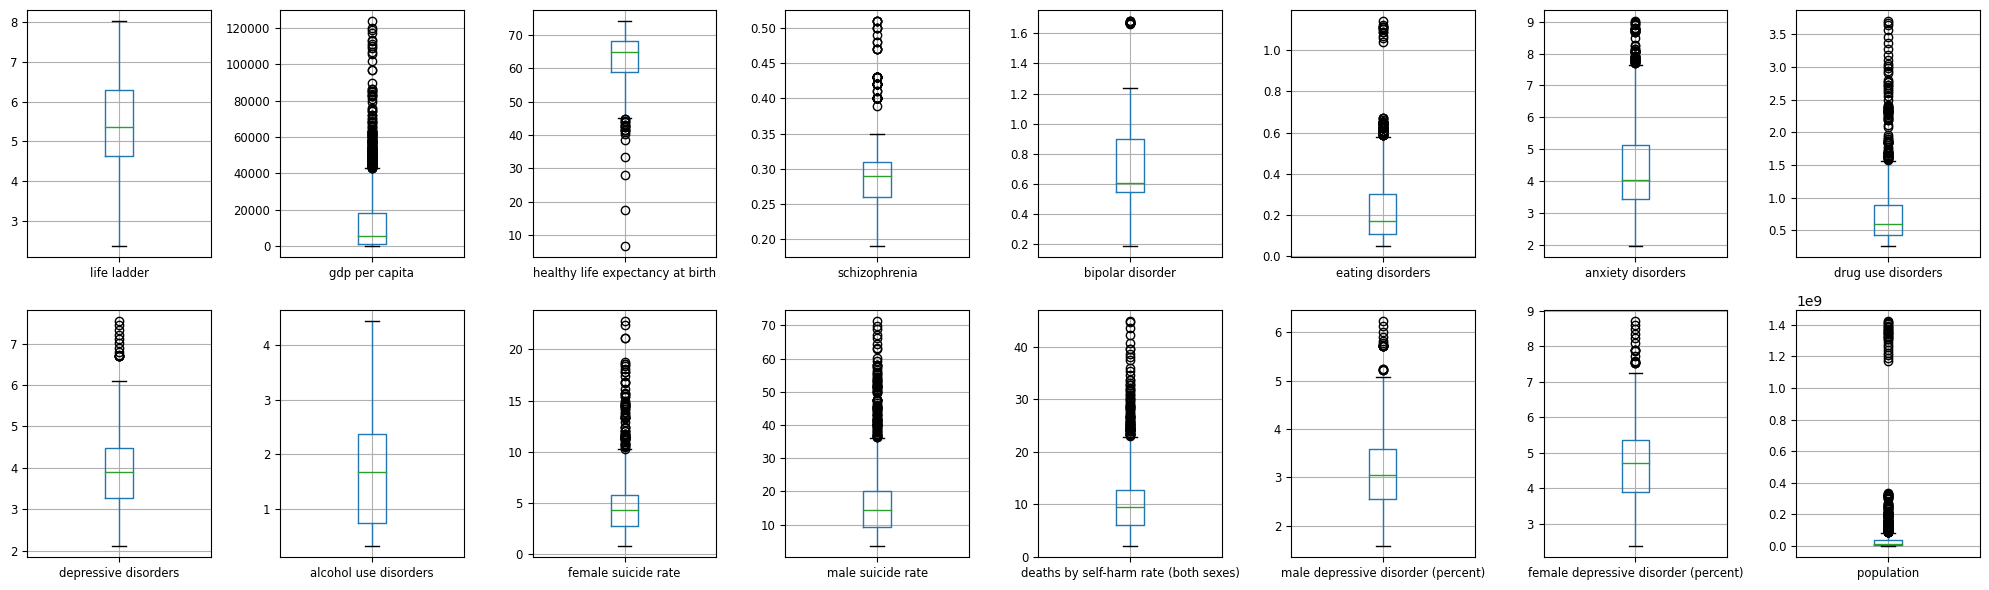

In [107]:
fig, axes = plt.subplots(2,8, figsize=(20,6))

for i, col in enumerate(list(df_all[columns_desstat].columns.values)):
  a = df_all.boxplot(col, ax=axes.flatten()[i], fontsize='small')

plt.tight_layout() 
plt.show()

In [108]:
q1=df_all[columns_desstat].quantile(0.25)
q3=df_all[columns_desstat].quantile(0.75)
iqr=q3-q1

((df_all[columns_desstat]<(q1-1.5*iqr))|(df_all[columns_desstat]>(q3+1.5*iqr))).sum()

life ladder                                0
gdp per capita                           201
healthy life expectancy at birth          20
schizophrenia                             66
bipolar disorder                          13
eating disorders                          67
anxiety disorders                         56
drug use disorders                        99
depressive disorders                      14
alcohol use disorders                      0
female suicide rate                       76
male suicide rate                        105
deaths by self-harm rate (both sexes)     91
male depressive disorder (percent)        19
female depressive disorder (percent)      17
population                               196
dtype: int64

In [109]:
df_eda=pd.DataFrame()
df_eda['skew']=df_all[columns_desstat].skew().round(decimals=3)
df_eda['kurtosis']=df_all[columns_desstat].kurtosis().round(decimals=3)
df_eda['variance']=df_all[columns_desstat].var().round(decimals=3)
df_eda

,skew,kurtosis,variance
life ladder,0.066,-0.717,1.280000e+00
gdp per capita,2.096,4.965,3.839017e+08
healthy life expectancy at birth,-1.213,3.322,4.940900e+01
schizophrenia,0.789,2.683,2.000000e-03
bipolar disorder,0.609,0.568,5.800000e-02
eating disorders,1.771,4.340,2.800000e-02
anxiety disorders,0.905,0.555,1.926000e+00
drug use disorders,2.366,7.678,2.350000e-01
depressive disorders,0.308,0.243,7.630000e-01
alcohol use disorders,0.333,-0.812,9.450000e-01


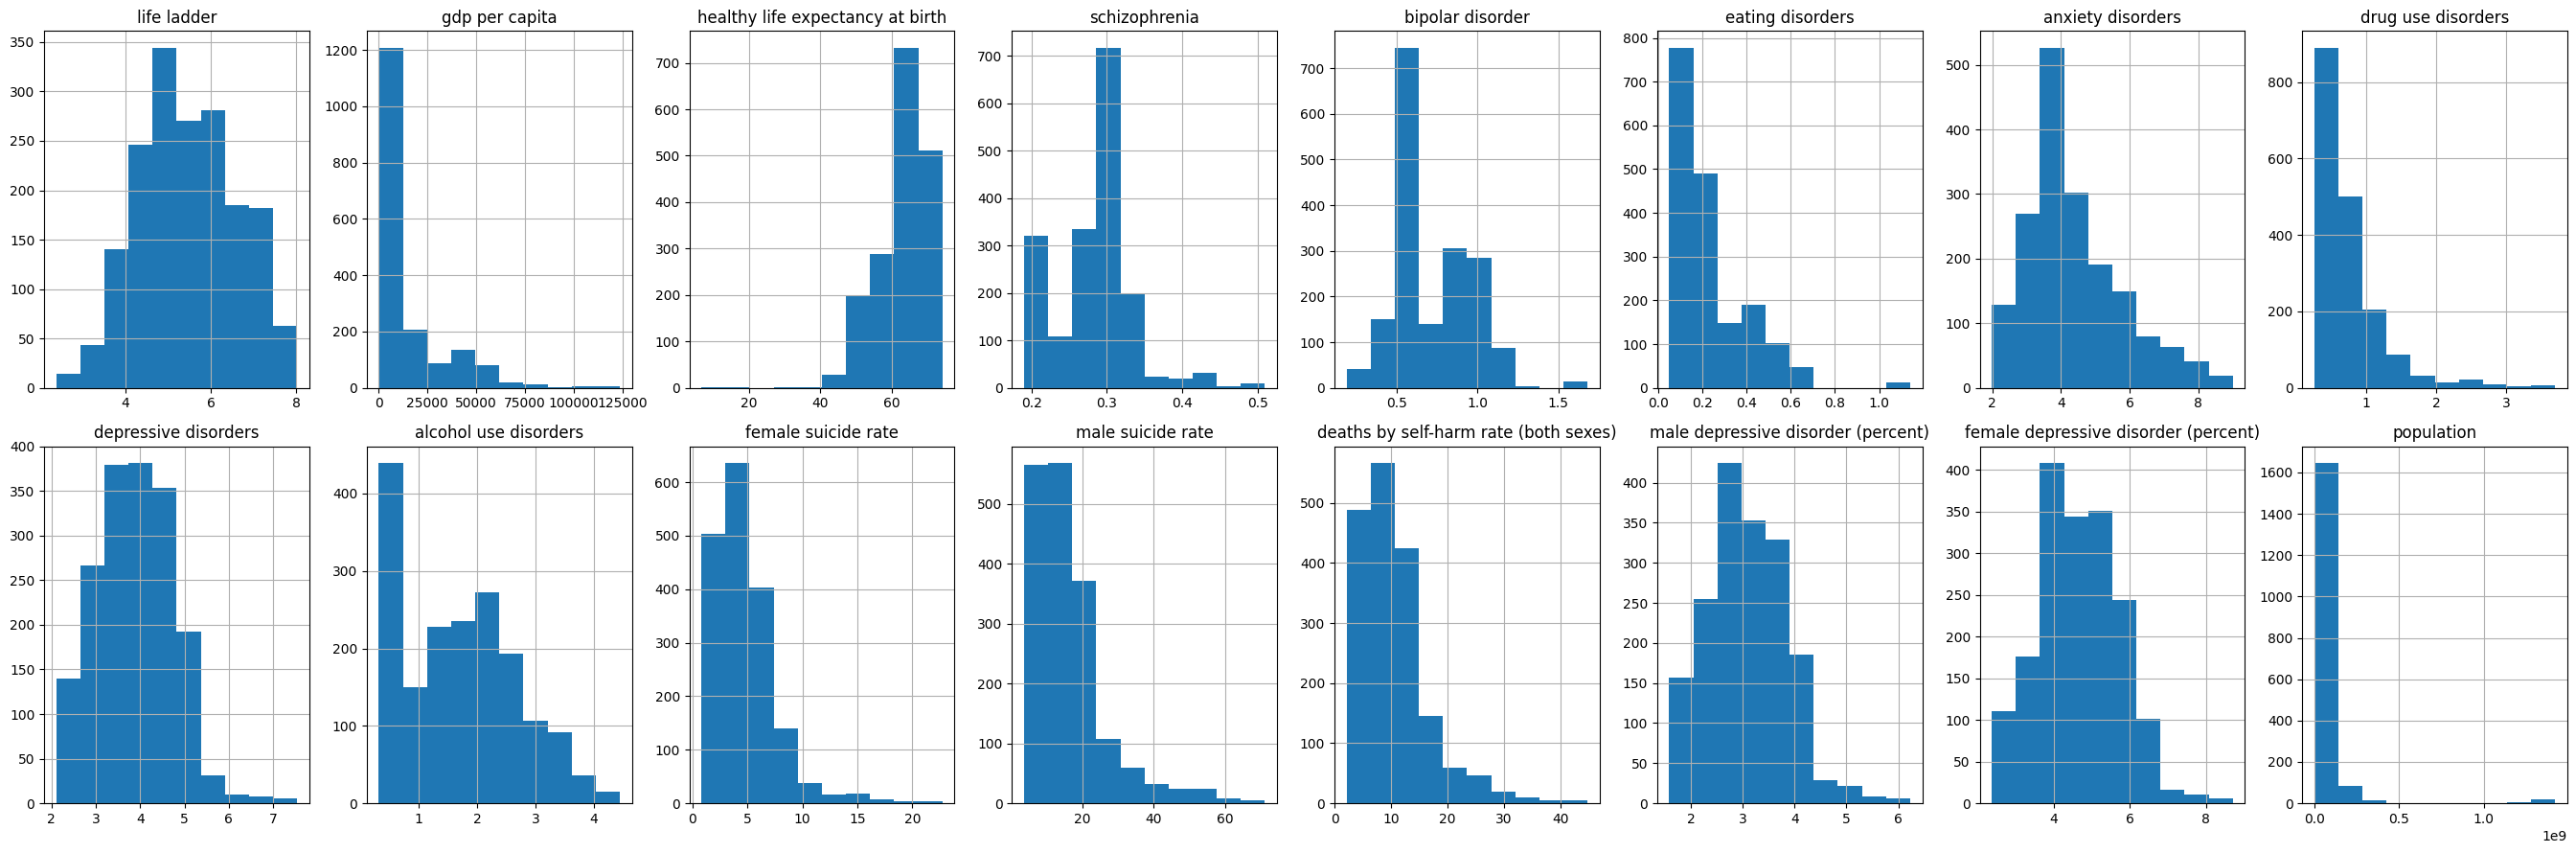

In [ ]:
fig, axes = plt.subplots(2,8)

for i, el in enumerate(list(df_all[columns_desstat].columns.values)):
  a = df_all.hist(el, ax=axes.flatten()[i])
  
fig.set_size_inches(27, 9)
plt.tight_layout() 
plt.show()

<ipython-input-110-bf15091c89f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all['life ladder'], color='forestgreen', axlabel='poziom satysfakcji życiowej').set(title='Histogram poziomu satysfakcji życiowej dla wszystkich krajów')


Text(0, 0.5, 'częstość występowania')

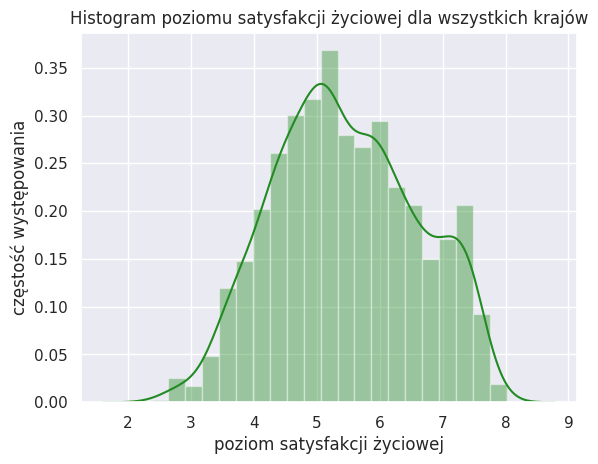

In [110]:
sns.set(font_scale=1.0)                                                                                                                                                              #rozkład dwumodalny
sns.distplot(df_all['life ladder'], color='forestgreen', axlabel='poziom satysfakcji życiowej').set(title='Histogram poziomu satysfakcji życiowej dla wszystkich krajów')
plt.ylabel('częstość występowania')

In [111]:
df_all3=df_all.copy()                                                                                                                          

df_all3['gdp per capita']=df_all3['gdp per capita'].ffill()
df_all3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                1768 non-null   object 
 1   year                                   1768 non-null   int64  
 2   life ladder                            1768 non-null   float64
 3   healthy life expectancy at birth       1768 non-null   float64
 4   alpha-3                                1768 non-null   object 
 5   schizophrenia                          1768 non-null   float64
 6   bipolar disorder                       1768 non-null   float64
 7   eating disorders                       1768 non-null   float64
 8   anxiety disorders                      1768 non-null   float64
 9   drug use disorders                     1768 non-null   float64
 10  depressive disorders                   1768 non-null   float64
 11  alco

In [112]:
columns_desstat2=['life ladder', 'gdp per capita', 'healthy life expectancy at birth', 'schizophrenia', 'bipolar disorder', 'eating disorders', 'anxiety disorders', 
                 'drug use disorders', 'depressive disorders', 'alcohol use disorders', 'deaths by self-harm rate (both sexes)']    #bez populacji

for col in df_all3[columns_desstat2]:           
  print(col,':', shapiro(df_all3[col]))

life ladder : ShapiroResult(statistic=0.9857193231582642, pvalue=2.9784742380800644e-12)
gdp per capita : ShapiroResult(statistic=0.7135269641876221, pvalue=0.0)
healthy life expectancy at birth : ShapiroResult(statistic=0.9170987606048584, pvalue=4.444335372662363e-30)
schizophrenia : ShapiroResult(statistic=0.8999650478363037, pvalue=1.7353546860016987e-32)
bipolar disorder : ShapiroResult(statistic=0.9387117624282837, pvalue=2.0684453706351892e-26)
eating disorders : ShapiroResult(statistic=0.8040139675140381, pvalue=6.567885902290418e-42)
anxiety disorders : ShapiroResult(statistic=0.940746009349823, pvalue=5.126955550748667e-26)
drug use disorders : ShapiroResult(statistic=0.7727869153022766, pvalue=3.783505853677006e-44)
depressive disorders : ShapiroResult(statistic=0.9862955808639526, pvalue=6.161131934495634e-12)
alcohol use disorders : ShapiroResult(statistic=0.9459940195083618, pvalue=5.980740571285983e-25)
deaths by self-harm rate (both sexes) : ShapiroResult(statistic=0.87

Dla zmiennej *gdp per capita* p-value jest mniejsza od 0,05, zatem rozkład zmiennej nie jest normalny. Wartość p zmiennej *life ladder* (oraz pozostałych) przekracza wartość 0,05, zatem brak podstaw do stwierdzenia, że dane nie pochodzą z rozkładu normalnego.

In [113]:
df_all2=df_all.copy()

In [114]:
df_box_cox=df_all2['gdp per capita']
trans_data, trans_lambda=stats.boxcox(df_box_cox)

<ipython-input-115-9fd6b702f0b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_box_cox, hist=True, kde=True, kde_kws={'fill':True, 'linewidth':2}, color ="forestgreen")


<Axes: xlabel='gdp per capita', ylabel='Density'>

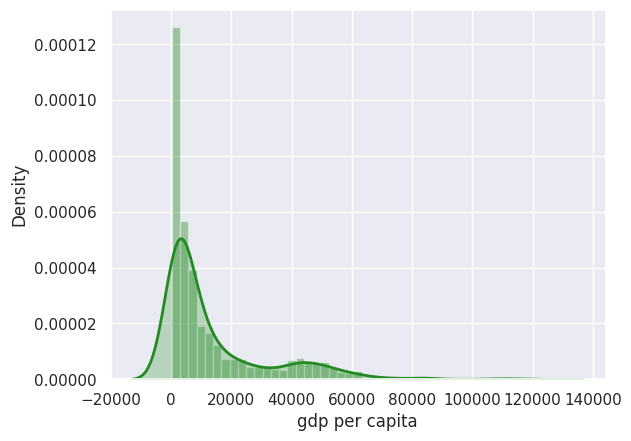

In [115]:
sns.distplot(df_box_cox, hist=True, kde=True, kde_kws={'fill':True, 'linewidth':2}, color="forestgreen")

In [116]:
shapiro(df_box_cox)

ShapiroResult(statistic=0.7135269641876221, pvalue=0.0)

In [117]:
df_all3['gdp per capita']=np.log(df_all['gdp per capita'])

<ipython-input-118-06cab5daefde>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all3['gdp per capita'], bins=14, color='forestgreen', axlabel='GPD per capita').set(title='Histogram GDP per capita dla wszystkich krajów')


Text(0, 0.5, 'częstość występowania')

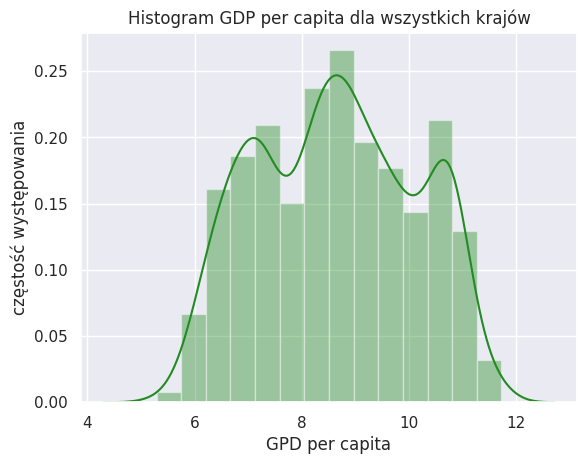

In [118]:
sns.set(font_scale=1.0)                                                                                                                                               
sns.distplot(df_all3['gdp per capita'], bins=14, color='forestgreen', axlabel='GPD per capita').set(title='Histogram GDP per capita dla wszystkich krajów')
plt.ylabel('częstość występowania')

In [119]:
shapiro(df_all3['gdp per capita'])              # histogram sugeruje rozkład trzymodalny ale wynik Shapiro-Wilka nie daje podstaw do odrzucenia hipotezy o normalności testu........?

ShapiroResult(statistic=0.9716300964355469, pvalue=3.382064419224125e-18)

Po nałożeniu logarytmu  wartość p zmiennej *gdp per capita* przekracza wartość 0.05, zatem brak podstaw do stwierdzenia, że dane nie pochodzą z rozkładu normalnego.

In [ ]:
sns.pairplot(df_all[['life ladder', 'gdp per capita', 'healthy life expectancy at birth', 'schizophrenia', 'bipolar disorder', 'eating disorders', 'anxiety disorders', 'drug use disorders', 'depressive disorders', 'alcohol use disorders', 
                     'female suicide rate', 'male suicide rate', 'deaths by self-harm rate (both sexes)', 'male depressive disorder (percent)', 'female depressive disorder (percent)']], height=2.2)
plt.show()

W następnym kroku przyjrzę się zależnościom między zmiennymi: obliczę współczynniki korelacji rang Spearmana oraz sprawdzę ich istotność statystyczną.

Text(0.5, 1.0, 'Macierz korelacji rang Spearmana')

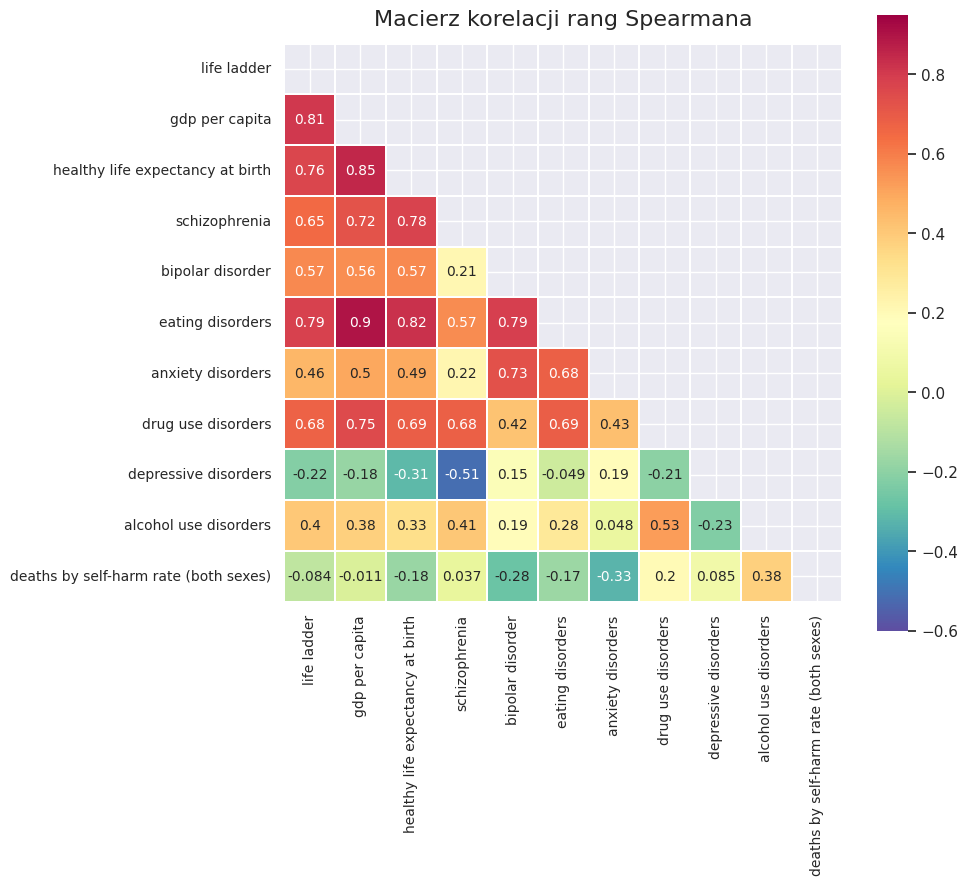

In [120]:
plt.figure(figsize=(9, 8))   
corr_psychop=df_all3[columns_desstat2].corr(method = 'spearman').round(decimals=3)
mask=np.zeros_like(corr_psychop)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_psychop, cmap='Spectral_r', mask=mask, square=True, vmin=-.6, vmax=0.95, annot=True, annot_kws={"size":10}, linewidths=1.2, linecolor='white')
plt.tick_params(labelsize=10)
plt.title('Macierz korelacji rang Spearmana', fontsize=16, pad=13)

In [121]:
df_all3[columns_desstat2].rcorr(method='spearman')

,life ladder,gdp per capita,healthy life expectancy at birth,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,deaths by self-harm rate (both sexes)
life ladder,-,***,***,***,***,***,***,***,***,***,***
gdp per capita,0.809,-,***,***,***,***,***,***,***,***,
healthy life expectancy at birth,0.763,0.85,-,***,***,***,***,***,***,***,***
schizophrenia,0.648,0.723,0.778,-,***,***,***,***,***,***,
bipolar disorder,0.569,0.56,0.571,0.212,-,***,***,***,***,***,***
eating disorders,0.785,0.898,0.825,0.568,0.788,-,***,***,*,***,***
anxiety disorders,0.456,0.496,0.491,0.22,0.731,0.68,-,***,***,*,***
drug use disorders,0.675,0.752,0.685,0.679,0.421,0.688,0.43,-,***,***,***
depressive disorders,-0.219,-0.181,-0.311,-0.514,0.149,-0.049,0.189,-0.206,-,***,***
alcohol use disorders,0.403,0.379,0.329,0.409,0.188,0.284,0.048,0.525,-0.23,-,***


Na początku przyjrzę się jak zmieniał się poziom poczucia szczęścia mieszkańców całego świata w latach 2007 - 2019. Następnie zidentyfikuję najmniej i najbardziej szczęśliwe narodowości w latach 2007 i 2019 oraz stworzę ranking krajów utworzony na podstawie średniego poziomu raportowanego poczucia szczęścia (uwzględniający wszystkie badane lata).

In [122]:
happiness_map=px.choropleth(df_all.sort_values('year'),                
              locations='alpha-3',
              color='life ladder', 
              hover_name='country',
              hover_data=['year', 'life ladder'],
              animation_frame='year',
              color_continuous_scale="YlGn",
              locationmode='ISO-3',
              scope='world',
              labels={'life ladder':'poziom<br>satysfakcji<br>życiowej'},
              range_color=(2.0, 8.2),
              width=1600,
              height=950)
happiness_map.update_layout(title_text='Poziom raportowanej satysfakcji życiowej na świecie w latach 2005-2019', font=dict(size=15), title_x=0.5)
happiness_map

In [123]:
to_agg={'life ladder': ['describe']}                                                # podstawowe statystyki opisowe dla zmiennej 'life ladder' dla poszczególnych krajów
df_all_describe=df_all.groupby(['country']).agg(to_agg).round(2)
df_all_describe.columns=df_all_describe.columns.droplevel([0, 1])
df_all_describe=df_all_describe.reset_index()
df_all_describe['range']=df_all_describe['max']-df_all_describe['min']  
df_all_describe

,country,count,mean,std,min,25%,50%,75%,max,range
0,Afghanistan,12.0,3.59,0.74,2.38,3.02,3.75,4.04,4.76,2.38
1,Albania,12.0,4.99,0.45,4.51,4.63,4.90,5.32,5.87,1.36
2,Algeria,8.0,5.39,0.47,4.74,5.20,5.33,5.50,6.35,1.61
3,Angola,4.0,4.42,0.82,3.79,3.90,4.15,4.67,5.59,1.80
4,Argentina,14.0,6.34,0.30,5.79,6.08,6.43,6.55,6.78,0.99
...,...,...,...,...,...,...,...,...,...,...
152,Venezuela,14.0,6.12,1.02,4.04,5.20,6.39,6.94,7.48,3.44
153,Vietnam,14.0,5.31,0.21,5.02,5.11,5.30,5.46,5.77,0.75
154,Yemen,12.0,3.91,0.57,2.98,3.62,4.01,4.25,4.81,1.83
155,Zambia,13.0,4.53,0.59,3.31,4.04,4.73,5.00,5.26,1.95


In [124]:
agg_des={'country':'count', 'life ladder':['mean', 'min', 'median', 'max', 'std', 'var']}           # podstawowe statystyki opisowe dla zmiennej 'life ladder' dla poszczególnych lat (wraz z liczebą krajów, których dane zostały zagregowane)
df_all_year=df_all.groupby(['year']).agg(agg_des).round(3)
df_all_year.columns=df_all_year.columns.droplevel(0)
df_all_year=df_all_year.reset_index()
df_all_year['range']=df_all_year['max']-df_all_year['min']
df_all_year

,year,count,mean,min,median,max,std,var,range
0,2005,27,6.446,4.719,6.620,8.019,0.919,0.845,3.300
1,2006,86,5.187,3.202,5.080,7.672,1.107,1.225,4.470
2,2007,100,5.434,3.280,5.238,7.834,1.050,1.103,4.554
3,2008,105,5.444,2.808,5.191,7.971,1.182,1.397,5.163
4,2009,108,5.493,3.408,5.375,7.683,1.035,1.070,4.275
5,2010,119,5.506,3.229,5.464,7.771,1.142,1.304,4.542
6,2011,139,5.443,2.936,5.267,7.788,1.100,1.209,4.852
7,2012,134,5.463,3.164,5.337,7.776,1.135,1.289,4.612
8,2013,130,5.415,2.688,5.269,7.594,1.188,1.412,4.906
9,2014,137,5.416,2.839,5.381,7.508,1.165,1.356,4.669


Jak wynika z tabeli, z upływającymi latami obserwujemy wzrost zmienności poziomu satysfakcji życiowej (wyrażony poprzez rozstęp).

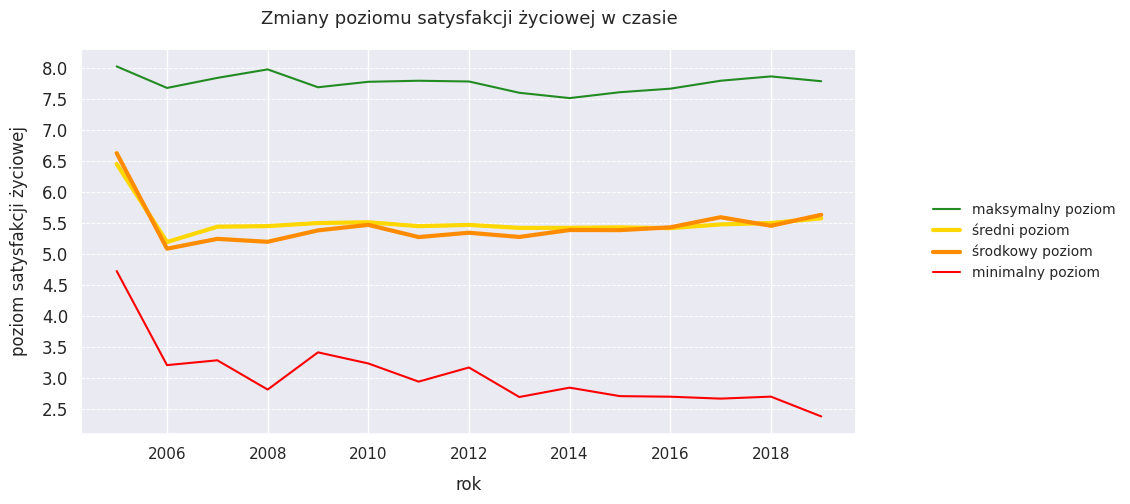

In [125]:
plt.rcParams['figure.figsize']=(10, 5)                                                              
plt.plot(df_all_year['year'], df_all_year['max'], color='forestgreen')
plt.plot(df_all_year['year'], df_all_year['mean'], linewidth=3, color='gold')
plt.plot(df_all_year['year'], df_all_year['median'], linewidth=3, color='darkorange')
plt.plot(df_all_year['year'], df_all_year['min'], color='red')
plt.title('Zmiany poziomu satysfakcji życiowej w czasie', fontsize=13, pad=18)
plt.yticks(np.arange(2.5, 8.5, 0.5), fontsize=12)
plt.grid(axis='y', linestyle = '--', linewidth = 0.7)
plt.xlabel('rok', fontsize=12, labelpad=10)
plt.ylabel('poziom satysfakcji życiowej', fontsize=12, labelpad=10)
plt.legend(['maksymalny poziom', 'średni poziom', 'środkowy poziom', 'minimalny poziom'], prop = {'size' : 10}, bbox_to_anchor=(1.35, 0.5), loc='center right', frameon=False)
plt.show()

Średni poziom satysfakcji życiowej od 2006 roku zaczyna utrzymuje się na mniej więcej stałym poziomie, z niewielką tendencją wzrostową od 2016 roku. Obserowowany spadek średniej w latach 2005-2006 zapewne wynika z niekompletnych danych, co można zaoważyć dzięki analizie kartogramu:

*   w 2005 roku nie zostały zebrane dane dla dwóch regionów świata (Afryka, Południowa Azja), w których przeciętny poziom satysfkacji utrzymuje się na wyraźnie niższym poziomie niż najszczęśliwszych rejonów świata (Europa, Ameryka Północna, Australia), stąd najwyższa (w obserowanym okresie) średnia tej zmiennej;
*   rak danych z części krajów europejskich i Autralii, spowodował spadek średniej, a pojawienie się  informacji z Afryki i Południowej Azji jeszcze pogłębiło ów spadek;
* wzrost średniej satysfakcji życiowej w 2007 wynika z pojawienia się kompletnych danych z Australii, Ameryki Północnej, większości danych z Europy.



In [ ]:
mean_top=df_all_describe.sort_values('mean', ascending=False).head(20)         
mean_bottom=df_all_describe.sort_values('mean').head(20)       
countries=list(mean_top['country'])
countries_bottom=list(mean_bottom['country'])

a=df_all[df_all['country'].isin(list(mean_top['country']))]
b=df_all[df_all['country'].isin(list(mean_bottom['country']))]

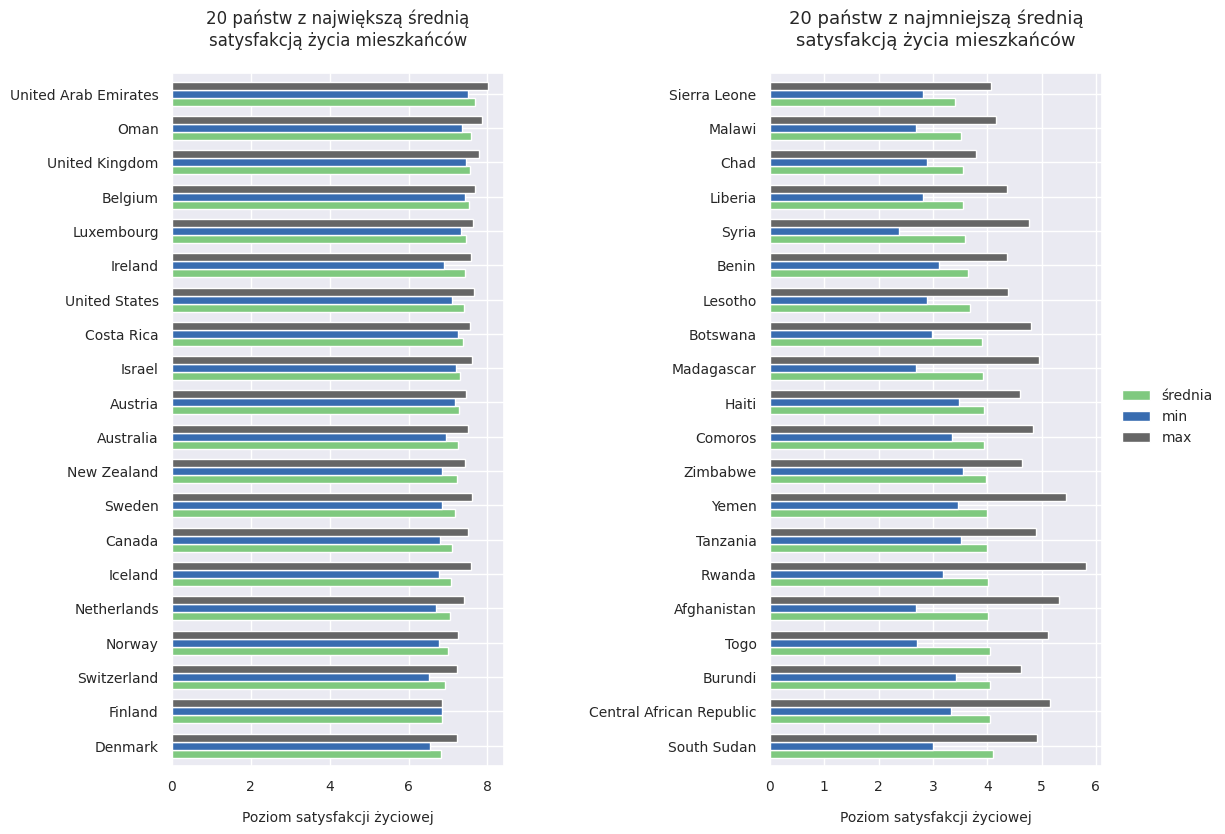

In [ ]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(12, 9))

mean_top[['mean', 'min', 'max']].sort_values('mean', ascending=True).plot(kind='barh', width = 0.7, ax=ax1, colormap='Accent', fontsize=10)
ax1.set_xlabel('Poziom satysfakcji życiowej', fontsize=10, labelpad=12)
ax1.set_title('20 państw z największą średnią\nsatysfakcją życia mieszkańców', fontsize=12, pad=20)
ax1.set_yticklabels(countries)
ax1.get_legend().remove()

mean_bottom[['mean', 'min', 'max']].sort_values('mean', ascending=False).plot(kind='barh', width = 0.7, ax=ax2, colormap='Accent', fontsize=10)
ax2.set_xlabel('Poziom satysfakcji życiowej', fontsize=10, labelpad=12)
ax2.set_title('20 państw z najmniejszą średnią\nsatysfakcją życia mieszkańców', fontsize=13, pad=20)
ax2.set_yticklabels(countries_bottom)
ax2.get_legend().remove()

fig.subplots_adjust(wspace=0.8)
fig.legend(['średnia', 'min', 'max'], prop = {'size' : 10}, loc='center right', frameon=False)
fig.show()

In [ ]:
df_2007_happiness=df_all.query("year==2007")
df_2007_the_happiest=df_2007_happiness.sort_values('life ladder', ascending=False).head(20)
df_2007_the_unhappiest=df_2007_happiness.sort_values('life ladder').head(20)

df_2019_happiness=df_all.query("year==2019")
df_2019_the_happiest=df_2019_happiness.sort_values('life ladder', ascending=False).head(20)    
df_2019_the_unhappiest=df_2019_happiness.sort_values('life ladder').head(20)

b=df_all[df_all['country'].isin(list(df_2007_the_happiest['country']))]
c=df_all[df_all['country'].isin(list(df_2007_the_unhappiest['country']))]

d=df_all[df_all['country'].isin(list(df_2019_the_happiest['country']))]
e=df_all[df_all['country'].isin(list(df_2019_the_unhappiest['country']))]

fig2007=pd.concat([b, c], ignore_index=True)
fig2019=pd.concat([d, e], ignore_index=True)

In [ ]:
figura=px.line(x=fig2007['year'], y=fig2007['life ladder'], color=fig2007['country'], hover_name=fig2007['country'])
figura.update_layout(title='Zmiany poziomu satysfakcji życiowej w czasie<br>w krajach o najwyższym i najniższym poziomie tej cechy w 2007 roku',
                    title_x=0.45,
                    title_font_size=22,
                    #title_pad=12,
                    xaxis_title='rok',
                    yaxis_title='poziom satysfakcji życiowej',
                    legend_title='',
                    legend_font_size=12,
                    legend_y=0.5,
                    font=dict(size=14),
                    hoverlabel=dict(bgcolor="white", font_size=14),
                    width=1600,
                    height=800)
figura.update_traces(hovertemplate='rok: %{x}, poziom satysfakcji życiowej: %{y}')
figura.add_hline(y=5.45, line_width=2, line_dash="dash", line_color="darkorange")   
figura.show()

In [ ]:
figura=px.line(x=fig2019['year'], y=fig2019['life ladder'], color=fig2019['country'], hover_name=fig2019['country'])
figura.update_layout(title='Zmiany poziomu satysfakcji życiowej w czasie<br>w krajach o najwyższym i najniższym poziomie tej cechy w 2019 roku',
                    title_x=0.45,
                    title_font_size=22,
                    #title_pad=12,
                    xaxis_title='rok',
                    yaxis_title='poziom satysfakcji życiowej',
                    legend_title='',
                    legend_font_size=12,
                    legend_y=0.5,
                    font=dict(size=14),
                    hoverlabel=dict(bgcolor="white", font_size=14),
                    width=1600,
                    height=800)
figura.update_traces(hovertemplate='rok: %{x}, poziom satysfakcji życiowej: %{y}')
figura.add_hline(y=5.45, line_width=2, line_dash="dash", line_color="darkorange") 
figura.show()

In [ ]:
bar=go.Bar(x=df_2007_the_happiest['country'],
           y=df_2007_the_happiest['life ladder'],
           name='2007', 
           marker_color='lightseagreen')

bar1=go.Bar(x=df_2019_the_happiest['country'],
            y=df_2019_the_happiest['life ladder'],
            name='2019',
            marker_color='forestgreen')

data=[bar, bar1]       
plotly.offline.iplot({'data':data,
                      'layout':go.Layout(barmode='group', 
                                         title="Najbardziej szczęśliwe kraje świata w latach 2007 i 2019",
                                         title_x=0.5,
                                         title_font=dict(size=20),
                                         legend_font=dict(size=16),
                                         width=1500, height=550)})              

In [ ]:
bar=go.Bar(x=df_2007_the_unhappiest['country'],
           y=df_2007_the_unhappiest['life ladder'],
           name='2007',
           marker_color='lightseagreen')

bar1=go.Bar(x=df_2019_the_unhappiest['country'],
            y=df_2019_the_unhappiest['life ladder'],
            name='2019',
            marker_color='forestgreen')

data=[bar, bar1]
plotly.offline.iplot({"data": data,
                      "layout": go.Layout(barmode='group', 
                                          title="Najmniej szczęśliwe kraje świata w latach 2007 i 2019 - TOP 20",
                                          title_x=0.5,
                                          title_font=dict(size=20),
                                          legend_font=dict(size=16),
                                          width=1500, height=550)})

PODSUMOWANIE POWYŻSZYCH:...................

In [ ]:
df_all_range=df_all_describe[['country', 'range']].sort_values('range')  
df_all_range=df_all_range[df_all_range['range']> 0]

fig=go.Figure()
fig.update_layout(barmode='group', title_text='Kraje o najmniejszym i największym zakresie zmienności poziomu satysfakcji życiowej w całym badanym okresie')
fig.add_trace(go.Bar(x=df_all_range['country'].head(20), y=df_all_range['range'].head(20)))
fig.add_trace(go.Bar(x=df_all_range['country'][-20:], y=df_all_range['range'][-20:]))

In [ ]:
df_change, df_change2=(pd.DataFrame(), pd.DataFrame())
for index, row in df_2007_happiness.iterrows():
  df_change['country']=df_2007_happiness['country']
  df_change['life ladder 2007']=df_2007_happiness['life ladder']

for index, row in df_2019_happiness.iterrows():
  df_change2['country']=df_2019_happiness['country']
  df_change2['life ladder 2019']=df_2019_happiness['life ladder']

df_diff=df_change.merge(df_change2, on='country', how='inner')
df_diff['life ladder change']=df_diff['life ladder 2019']-df_diff['life ladder 2007']
df_diff.sort_values('life ladder change', inplace=True)

fig = go.Figure()
fig.update_layout(barmode='group', title_text='Największe zmiany w poziomie satysfakcji życiowej w porównaniu lat 2007 i 2019')
fig.add_trace(go.Bar(x=df_diff['country'].head(20), y=df_diff['life ladder change'].head(20)))
fig.add_trace(go.Bar(x=df_diff['country'][-20:], y=df_diff['life ladder change'][-20:]))


In [ ]:
df_all4=df_all3.groupby('country').mean().reset_index()
df_all4.head()

<ipython-input-130-56c2f3371499>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,country,year,life ladder,healthy life expectancy at birth,schizophrenia,bipolar disorder,eating disorders,anxiety disorders,drug use disorders,depressive disorders,alcohol use disorders,female suicide rate,male suicide rate,deaths by self-harm rate (both sexes),male depressive disorder (percent),female depressive disorder (percent),population,gdp per capita
0,Afghanistan,2013.500000,3.594628,52.170833,0.225000,0.7225,0.115000,4.926667,0.553333,5.108333,0.437500,4.753333,14.510000,6.705833,4.380000,5.830000,32038722.666667,6.264249
1,Albania,2013.416667,4.990636,68.344167,0.306667,0.5800,0.135833,4.048333,0.480833,2.613333,1.725833,3.105000,7.403333,5.072500,1.766667,3.416667,2898151.916667,8.382681
2,Algeria,2014.625000,5.389717,65.962500,0.260000,0.8000,0.216250,4.983750,0.477500,4.306250,0.431250,2.343750,6.190000,3.723750,3.432500,5.173750,39316111.0,8.434302
3,Angola,2012.500000,4.420299,52.150001,0.220000,0.5600,0.132500,4.040000,0.350000,5.840000,1.102500,4.930000,21.917500,13.130000,4.937500,6.637500,25680692.5,8.534202
4,Argentina,2012.500000,6.339423,66.550000,0.335714,1.1150,0.344286,5.319286,0.742143,2.626429,2.275714,4.103571,18.310000,10.663571,2.029286,3.171429,42159690.285714,9.282341


In [ ]:
figg=px.scatter(df_all4, x='gdp per capita', y='life ladder', size=list(df_all4['population']), size_max=75, hover_name=df_all4['country'], 
                title='Związek między wysokością PKB na mieszkańca a poziomem satysfakcji życiowej<br>dla wszystkich krajów świata (z uwzględnieniem wielkości populacji)', 
                color_continuous_scale=px.colors.sequential.Viridis, range_color=[0.05,1.4], height=600, width=1600)
figg.update_layout(legend=dict(x=0, y=1, font=dict(size=12), bgcolor="white", bordercolor="white"),
                   title=dict(font_size=20, x=0.45))
figg.update_xaxes(title='PKB na mieszkańca (USD)')
figg.update_yaxes(title='poziom satysfakcji życiowej')
figg.show()

### REGRESJA LINIOWA

na zlogarytmowanych danych GDP

In [ ]:
df_all5=df_all3.copy()

index_gdp=df_all5[df_all5['gdp per capita'].isnull()].index
df_all5.drop(index_gdp, inplace=True)

In [ ]:
lin_reg=pg.linear_regression(df_all5['gdp per capita'], df_all5['life ladder'])        # przewidywanie satysfakcji życiowej na postawie GDP per capita
lin_reg.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.09,0.09,0.91,0.36,0.66,0.66,-0.1,0.27
1,gdp per capita,0.62,0.01,58.18,0.00,0.66,0.66,0.6,0.64


*GDP per capita* jest istotnym statystycznie (T = 57.68, p-value < 0.05) predyktorem satysfakcji życiowej. Współczynnik determinacji (tak jak skorygowany współczynnik determinacji) wynosi 0.67, co znaczy, że stworzony model regresji wyjaśnia około 67% zmienności satysfakcji życiowej. 

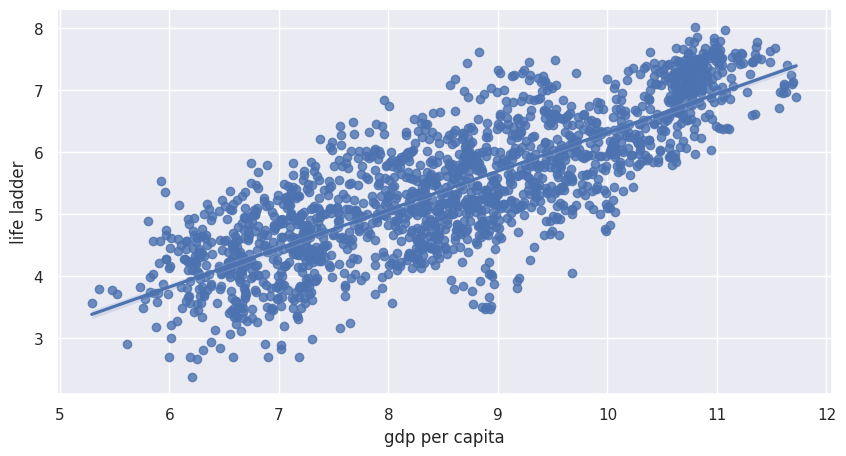

In [ ]:
corr_l_g=pg.corr(df_all5['gdp per capita'], df_all5['life ladder'], method='spearman')
sns.regplot(x='gdp per capita', y='life ladder', data=df_all5)
plt.show()

In [ ]:
corr_l_g

,n,r,CI95%,p-val,power
spearman,1768,0.808894,"[0.79, 0.82]",0.0,1.0


In [ ]:
 pg.homoscedasticity(df_all5[['life ladder', 'gdp per capita']], method="bartlett", alpha=.05)

,T,pval,equal_var
bartlett,121.139595,3.561675e-28,False


In [ ]:
#--------------------------------

In [ ]:
depression_map=px.choropleth(df_psychopathology_age.sort_values('year'),                
              locations='code',
              color='depressive disorder (15-49)', 
              hover_name='country',
              hover_data=['year', 'depressive disorder (15-49)'],
              animation_frame='year',
              color_continuous_scale="YlGnBu",
              locationmode='ISO-3',
              scope='world',
              labels={'depressive disorder (15-49)':'procent mieszkanców<br>chorych na depresję'},
              range_color=(2, 10.8),
              width=1600,
              height=950)
depression_map.update_layout(title_text='Częstoliwość występowania depresji na świecie w latach 1990-2019', font=dict(size=15), title_x=0.5)
depression_map

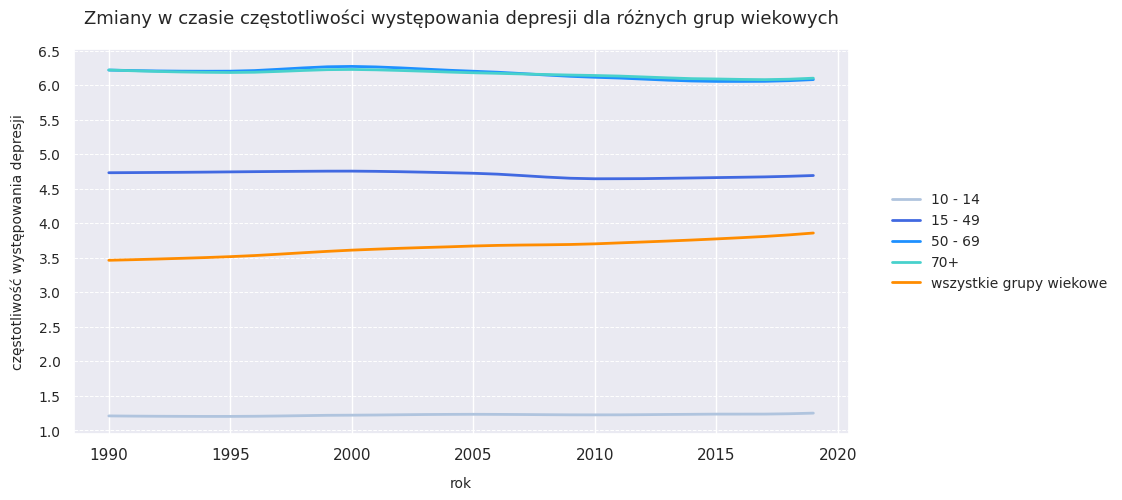

In [ ]:
k=df_psychopathology_age[['year', 'depressive disorder (10-14)', 'depressive disorder (15-49)', 'depressive disorder (50-69)', 'depressive disorder (70+)', 'depressive disorder (all ages)']].groupby('year').mean().reset_index()

plt.rcParams['figure.figsize']=(10, 5)       
plt.plot(k['year'], k['depressive disorder (10-14)'], linewidth=2, color='lightsteelblue')                                                       
plt.plot(k['year'], k['depressive disorder (15-49)'], linewidth=2, color='royalblue')
plt.plot(k['year'], k['depressive disorder (50-69)'], linewidth=2, color='dodgerblue')
plt.plot(k['year'], k['depressive disorder (70+)'], linewidth=2, color='mediumturquoise')
plt.plot(k['year'], k['depressive disorder (all ages)'], linewidth=2, color='darkorange')
plt.title('Zmiany w czasie częstotliwości występowania depresji dla różnych grup wiekowych', fontsize=13, pad=18)
plt.yticks(np.arange(1.0, 7.0, 0.5), fontsize=10)
plt.grid(axis='y', linestyle = '--', linewidth = 0.7)
plt.xlabel('rok', fontsize=10, labelpad=10)
plt.ylabel('częstotliwość występowania depresji', fontsize=10, labelpad=10)
plt.legend(['10 - 14', '15 - 49', '50 - 69', '70+', 'wszystkie grupy wiekowe'], prop = {'size' : 10}, bbox_to_anchor=(1.35, 0.5), loc='center right', frameon=False)
plt.show()

Sprawdzam, czy między wartościami dla badanych grupa istnieje istotna statystyczna różnica.

In [ ]:
columns_age=['depressive disorder (10-14)', 'depressive disorder (all ages)', 'depressive disorder (70+)', 'depressive disorder (50-69)', 'depressive disorder (15-49)']

for col in df_psychopathology_age[columns_age]:           # wyłączam z analizy grupę wiekową 10-14, ponieważ wymaganiem testu ANOVA są normalne rozkłady badanych wartości
  print(col,':', shapiro(df_psychopathology_age[col]))

depressive disorder (10-14) : ShapiroResult(statistic=0.8811017274856567, pvalue=0.0)
depressive disorder (all ages) : ShapiroResult(statistic=0.9639386534690857, pvalue=8.536046230981674e-36)
depressive disorder (70+) : ShapiroResult(statistic=0.9417303204536438, pvalue=5.142765364072079e-43)
depressive disorder (50-69) : ShapiroResult(statistic=0.9727833271026611, pvalue=6.978640184878407e-32)
depressive disorder (15-49) : ShapiroResult(statistic=0.9580197334289551, pvalue=5.24075592360477e-38)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
 pg.homoscedasticity(df_psychopathology_age[['depressive disorder (all ages)', 'depressive disorder (70+)',               # wartość p-value wkazuje na potrzebę skorzystania z testu Welcha 
       'depressive disorder (50-69)', 'depressive disorder (15-49)']], method="bartlett", alpha=.05)

,T,pval,equal_var
bartlett,3879.381054,0.0,False


In [126]:
df_anova=pd.melt(df_psychopathology_age[['country', 'depressive disorder (all ages)', 'depressive disorder (70+)',
       'depressive disorder (50-69)', 'depressive disorder (15-49)']], id_vars='country')
df_anova.drop(['country'], axis=1, inplace=True)
df_anova.rename(columns={df_anova.columns[0]: 'grupa wiekowa', df_anova.columns[1]: 'częstotliwość'},inplace=True)

aov = welch_anova(dv='częstotliwość', between='grupa wiekowa', data=df_anova)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,grupa wiekowa,3,12489.992619,5039.296982,0.0,0.330938


In [127]:
pg.pairwise_gameshowell(data=df_anova, dv='częstotliwość',
                        between='grupa wiekowa').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,depressive disorder (15-49),depressive disorder (50-69),4.707,6.167,-1.460,0.026,-55.653,10924.034,0.0,-1.032
1,depressive disorder (15-49),depressive disorder (70+),4.707,6.163,-1.456,0.031,-46.423,9461.751,0.0,-0.861
2,depressive disorder (15-49),depressive disorder (all ages),4.707,3.650,1.057,0.020,52.501,10889.087,0.0,0.973
3,depressive disorder (50-69),depressive disorder (70+),6.167,6.163,0.004,0.034,0.103,10926.237,1.0,0.002
4,depressive disorder (50-69),depressive disorder (all ages),6.167,3.650,2.517,0.024,104.379,9419.083,0.0,1.935
5,depressive disorder (70+),depressive disorder (all ages),6.163,3.650,2.513,0.030,84.851,8114.459,0.0,1.573


Wyniki powyższych testów statystycznych wskazują iż:

*   częstotliwości występowania depresji w wybranych grupach wiekowych są heteroskedastyczne,
*   badane grupy wiekowe różnią się między sobą w sposób istotny statycznie oprócz pary wiekowej 50-69 lat i 70+.


